In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

%matplotlib inline

In [2]:
# loading the datasets
train_data = pd.read_csv('Dataset/train.csv')
test_data = pd.read_csv('Dataset/test.csv')

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
train_data.shape

(891, 12)

In [8]:
train_data.nunique(axis = 0)

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [9]:
train_data.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Ekstrom, Mr. Johan",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


In [10]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
# Centrallity Measure : Understand the numerical features (Fare)
print('Mean Fare : {}'.format(train_data.Fare.mean()))
print('Meadian Fare : {}'.format(train_data.Fare.median()))

Mean Fare : 32.2042079685746
Meadian Fare : 14.4542


In [12]:
# Dispersion Measure : For Fare
print('Minimum Fare : {}'.format(train_data.Fare.min())) # Minimum Fare
print('Maximum Fare : {}'.format(train_data.Fare.max())) # Maximum Fare
print('Fare Range : {}'.format(train_data.Fare.max() - train_data.Fare.min())) # Fare Range
print('25% : {}'.format(train_data.Fare.quantile(.25))) # 25 %
print('50% : {}'.format(train_data.Fare.quantile(.5))) # 50%
print('75% : {}'.format(train_data.Fare.quantile(.75))) # 75%
print('Variance Fare : {}'.format(train_data.Fare.var())) # Variance
print('Standard Deviation Fare : {}'.format(train_data.Fare.std())) # Standard Deviation

Minimum Fare : 0.0
Maximum Fare : 512.3292
Fare Range : 512.3292
25% : 7.9104
50% : 14.4542
75% : 31.0
Variance Fare : 2469.436845743117
Standard Deviation Fare : 49.693428597180905


<AxesSubplot:xlabel='Fare'>

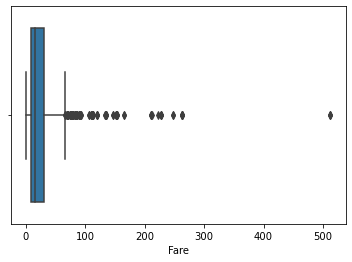

In [13]:
# Box-plot for Fare feature
sbn.boxplot(x = 'Fare', data = train_data)

In [14]:
# Categorical Features
train_data.Sex.value_counts() # counts

male      577
female    314
Name: Sex, dtype: int64

In [15]:
train_data.Sex.value_counts(normalize = True) # In Propotions or Percentile

male      0.647587
female    0.352413
Name: Sex, dtype: float64

In [16]:
# How many pessengers are survivrd
train_data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [17]:
train_data.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

# Univariate Analysis

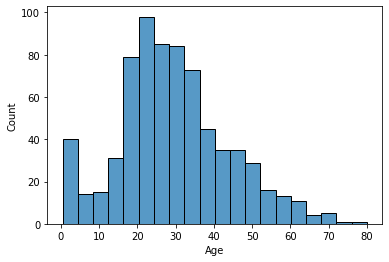

In [18]:
sbn.histplot(x = 'Age', data = train_data);

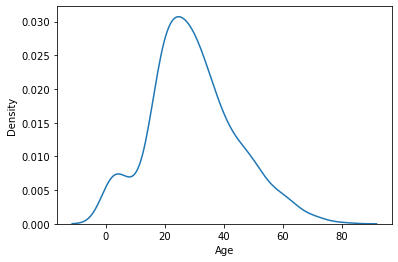

In [19]:
sbn.kdeplot(x = 'Age', data = train_data);

In [20]:
# Skewness in Age
print('Skewness in Age : {0:.2f}'.format(train_data.Age.skew()))

Skewness in Age : 0.39


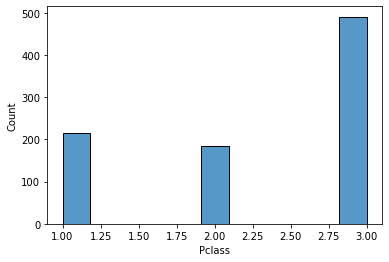

In [21]:
sbn.histplot(x = 'Pclass', data = train_data);

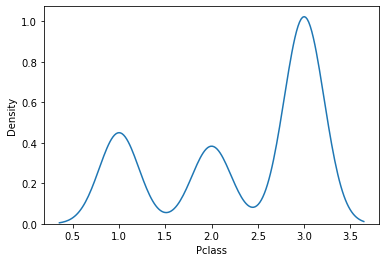

In [22]:
sbn.kdeplot(x = 'Pclass', data = train_data);

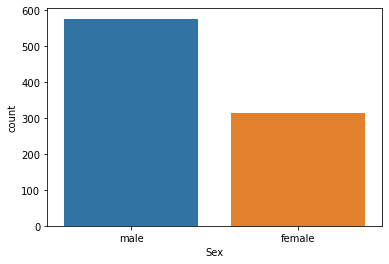

In [23]:
sbn.countplot(x = 'Sex', data = train_data);

#### Observation : we can see that more than 50% passenger are male

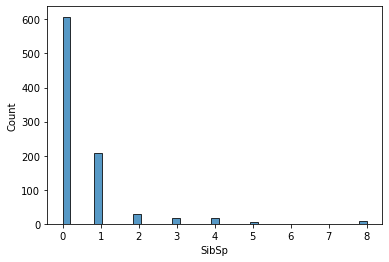

In [24]:
sbn.histplot(x = 'SibSp', data = train_data);

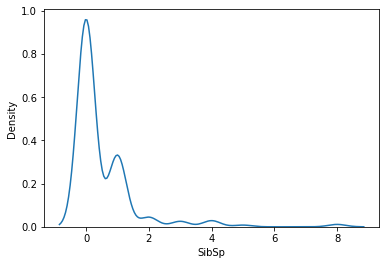

In [25]:
sbn.kdeplot(x = 'SibSp', data = train_data);

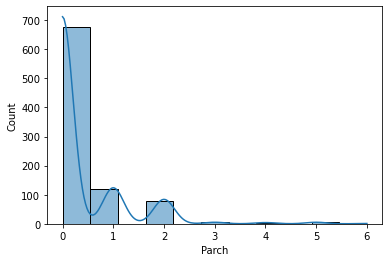

In [26]:
sbn.histplot(x = 'Parch', data = train_data, kde = True);

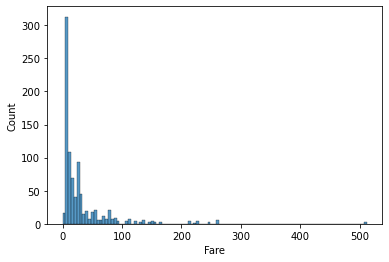

In [27]:
sbn.histplot(x = 'Fare', data = train_data);

<AxesSubplot:xlabel='Fare', ylabel='Density'>

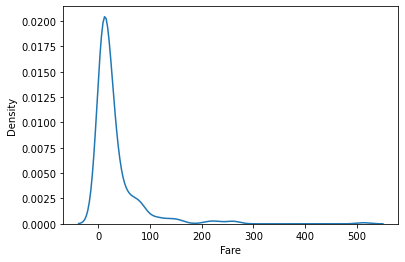

In [28]:
sbn.kdeplot(x = 'Fare', data = train_data)

In [29]:
# Skewness of Fare 
print("Skewness in Fare : {0:.2f}".format(train_data.Fare.skew()))

Skewness in Fare : 4.79


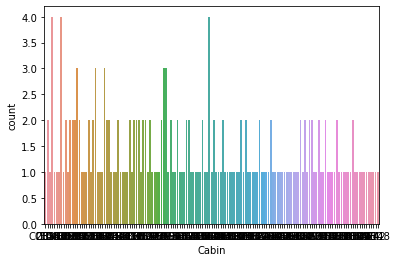

In [30]:
sbn.countplot(x = 'Cabin', data = train_data);

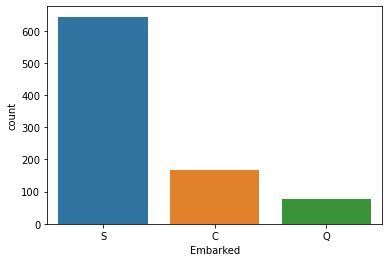

In [31]:
sbn.countplot(x = 'Embarked', data = train_data);

<AxesSubplot:xlabel='Embarked', ylabel='Age'>

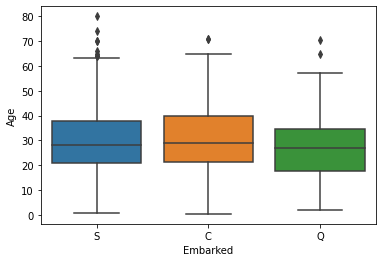

In [32]:
sbn.boxplot(x = 'Embarked',  y = 'Age', data = train_data)

# Bivariate Analysis

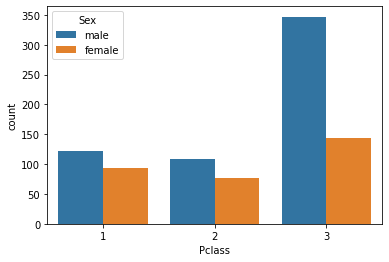

In [33]:
# How many male and female passengers were present on each passenger Class (Pclass) 
sbn.countplot(x = 'Pclass', data = train_data, hue = 'Sex');

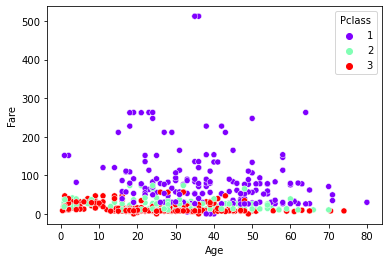

In [34]:
sbn.scatterplot(x = 'Age', y = 'Fare', data = train_data, hue = 'Pclass', palette = 'rainbow');

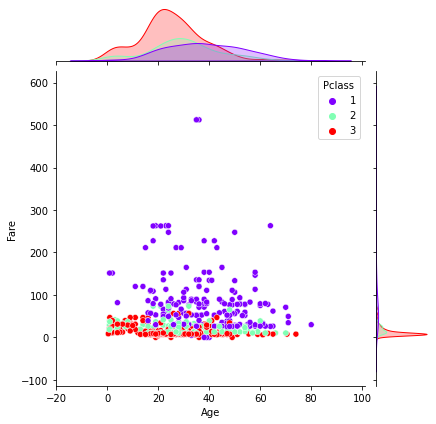

In [35]:
sbn.jointplot(x = 'Age', y = 'Fare', data = train_data, hue = 'Pclass', palette = 'rainbow')

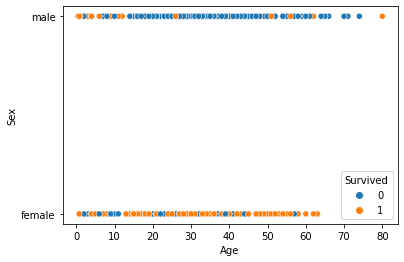

In [36]:
sbn.scatterplot(x = 'Age', y = 'Sex', data = train_data, hue = 'Survived');

<AxesSubplot:xlabel='Age', ylabel='count'>

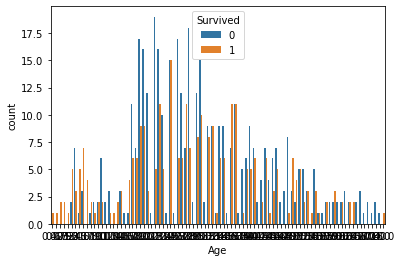

In [37]:
sbn.countplot(x = 'Age', data = train_data, hue = 'Survived')

In [38]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [39]:
# Average Age of the male and female passenger are
train_data.groupby(['Sex']).Age.median()

Sex
female    27.0
male      29.0
Name: Age, dtype: float64

In [40]:
# Average fare based on the passenger calss
train_data.groupby(['Pclass']).Fare.median()

Pclass
1    60.2875
2    14.2500
3     8.0500
Name: Fare, dtype: float64

In [41]:
# Average Fare based on the Passenger class and their respective Enbarked point
train_data.groupby(['Pclass', 'Embarked']).Fare.median()

Pclass  Embarked
1       C           78.2667
        Q           90.0000
        S           52.0000
2       C           24.0000
        Q           12.3500
        S           13.5000
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

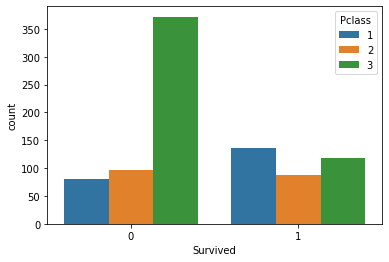

In [42]:
# How many pessenger survived on the basis of Pclass
sbn.countplot(x = 'Survived', data = train_data, hue = 'Pclass');

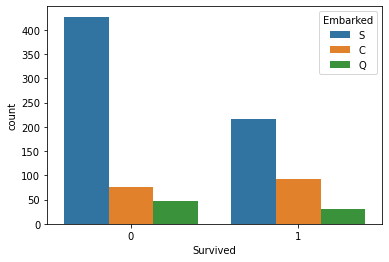

In [43]:
# How many pessengers survived Embarked wise
sbn.countplot(x = 'Survived', data = train_data, hue = 'Embarked');

# For test dataset

In [44]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [45]:
test_data.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [46]:
test_data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,418.0,1100.500000,120.810458,892.00,996.2500,1100.5000,1204.75,1309.0000
Pclass,418.0,2.265550,0.841838,1.00,1.0000,3.0000,3.00,3.0000
Age,332.0,30.272590,14.181209,0.17,21.0000,27.0000,39.00,76.0000
SibSp,418.0,0.447368,0.896760,0.00,0.0000,0.0000,1.00,8.0000
Parch,418.0,0.392344,0.981429,0.00,0.0000,0.0000,0.00,9.0000
Fare,417.0,35.627188,55.907576,0.00,7.8958,14.4542,31.50,512.3292


In [47]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# Missing Value:
### Train Dataset: Missing value available in Age, Cabin and Embarked columns. 
### Test Dataset: Missing value available in Age, Fare and Cabin columns 

# Lets handle the missing value in train_data and test_data 

In [48]:
# First we handling the Categorical features(Cabin and Embarked) in train_data 
nan_values = [feature for feature in train_data.columns if train_data[feature].isnull().sum()>1 and train_data[feature].dtypes == 'O']

for feature in nan_values:
    print('{} : {}% missing values'.format(feature, np.round(train_data[feature].isnull().mean(), 4)))

Cabin : 0.771% missing values
Embarked : 0.0022% missing values


In [49]:
# Replacing the Nan Values with missing label
def replace_cf(train_data, nan_values):
    data = train_data.copy()
    data[nan_values] = data[nan_values].fillna('Missing')
    return data

train_data = replace_cf(train_data, nan_values)

train_data[nan_values].isnull().sum()

Cabin       0
Embarked    0
dtype: int64

In [50]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Missing,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Missing,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Missing,S
